<a href="https://colab.research.google.com/github/RomanKhakhula/python_dsml_mod_16_hw/blob/main/dsml_mod16_hw_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build / train / save model 1

In [ ]:
!pip install tensorflow==2.16.2

In [ ]:
# impor packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Resizing

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [ ]:
# import dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
nr_of_clases = len(np.unique(y_train))

# change type uint8 to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# normalize features values
x_train, x_test = x_train / 255., x_test / 255.

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# fitting process visualization
def show_fit_history(history):
  fig = plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], marker = 'o', markersize = 3, color = 'b', label = 'train loss')
  plt.plot(history.history['val_loss'], marker = 'o', markersize = 3, linestyle = '--', color = 'r', label = 'test loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.grid(True)
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['sparse_categorical_accuracy'], marker = 'o', markersize = 3, color = 'b', label = 'train accuracy')
  plt.plot(history.history['val_sparse_categorical_accuracy'], marker = 'o', markersize = 3, linestyle = '--', color = 'r', label = 'test accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.legend()

  plt.show()

In [ ]:
# build model
lr = 0.0001
nr_of_features = 28*28
nr_of_units = nr_of_features + 2
dropout_rate = 0.7
batchsize = 512

my_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),

    keras.layers.Flatten(),
    keras.layers.Dense(units = nr_of_units, activation = "relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(units = nr_of_clases, activation = 'relu')
    ])

my_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = lr),
    metrics=[metrics.SparseCategoricalAccuracy()])

my_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 786)                 │         453,522 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 786)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 517,136 (1.97 MB)

 Trainable params: 517,136 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nr_of_epochs = 10
target_acc = 0.93
max_epochs = 300
full_history = None
strat_loop = True
nr_of_loops = 0

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.9897 - sparse_categorical_accuracy: 0.3392 - val_loss: 0.8880 - val_sparse_categorical_accuracy: 0.6925
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8923 - sparse_categorical_accuracy: 0.6758 - val_loss: 0.6955 - val_sparse_categorical_accuracy: 0.7448
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7156 - sparse_categorical_accuracy: 0.7346 - val_loss: 0.6199 - val_sparse_categorical_accuracy: 0.7697
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6482 - sparse_categorical_accuracy: 0.7561 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.7834
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6080 - sparse_categorical_accuracy: 0.7733 - val_loss: 0.5459 - val_sparse_categorical_accuracy: 0.7957
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5658 - sparse_categorical_accuracy: 0.7882 - val_loss: 0.5211 - val_sparse_categorical_accuracy: 0.8082
Epo

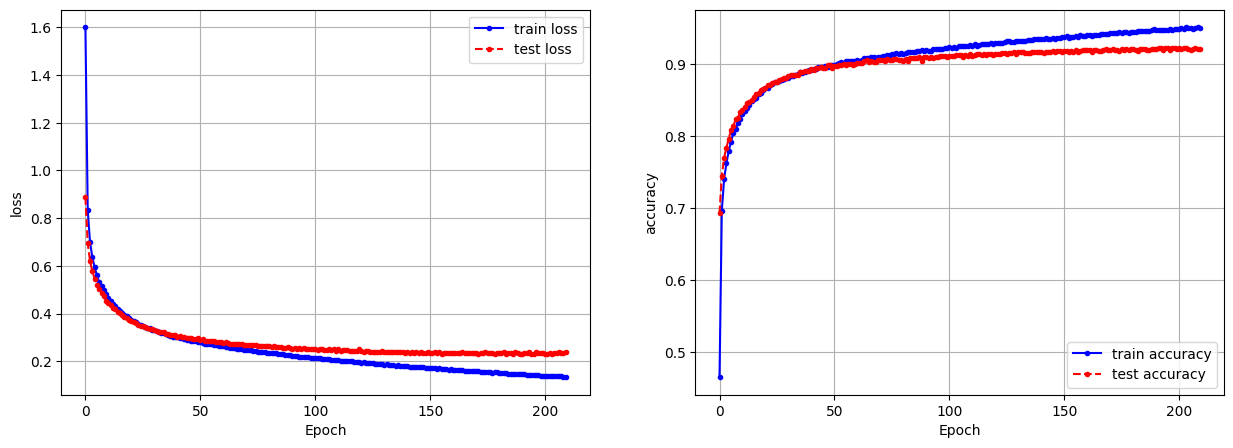

In [ ]:
while strat_loop == True:
  nr_of_loops += 1
  fit_history = my_model.fit(x_train, y_train, batch_size = batchsize, epochs = nr_of_epochs, validation_data = (x_test, y_test))
  if full_history == None:
    full_history = fit_history
  else:
    for key in full_history.history:
      full_history.history[key] = full_history.history[key] + fit_history.history[key]

  curr_acc = sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10
  delta_acc = ((sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10) / (sum(full_history.history['val_sparse_categorical_accuracy'][-20:])/20)) if nr_of_loops > 2 else 2
  delta_loss = ((sum(full_history.history['val_loss'][-10:])/10) / (sum(full_history.history['val_loss'][-20:])/20)) if nr_of_loops > 2 else 0

  print(f'Current accuracy: {curr_acc}, delta accuracy: {delta_acc}, delta loss: {delta_loss}')


  if (curr_acc >= target_acc) or ((nr_of_loops * nr_of_epochs) >= max_epochs) or ((delta_acc < 1) and (delta_loss > 1)):
    strat_loop = False

  if sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10 >= target_acc:
    strat_loop = False

show_fit_history(full_history)

In [ ]:
my_model_1_history = pd.DataFrame(np.array([['my_model_1' for el in full_history.history['loss']], full_history.history['loss'],
                                            full_history.history['sparse_categorical_accuracy'], full_history.history['val_loss'],
                                            full_history.history['val_sparse_categorical_accuracy']]).T,
                                  columns = ['model', 'train_loss', 'train_acc', 'val_loss',
                                              'val_acc'])


my_model_1_history.to_csv('/content/drive/MyDrive/saved_models/my_model_1_history.csv', index=False)
my_model.save('/content/drive/MyDrive/saved_models/my_model_1.h5')
my_model.save('/content/drive/MyDrive/saved_models/my_model_1.keras')

## Build / train / save model 2 (based on VGG16)

In [ ]:
# import dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
nr_of_clases = len(np.unique(y_train))

# preprocesing to using with VGG16
x_train, x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis = 3)), tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis = 3))
x_train, x_test = keras.layers.Resizing(32, 32)(x_train), keras.layers.Resizing(32, 32)(x_test)

# change type uint8 to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# normalize features values
x_train, x_test = x_train / 255., x_test / 255.

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# build model
lr = 0.00001
nr_of_features = 28*28
nr_of_units = nr_of_features + 2
dropout_rate = 0.7
batchsize = 512

# my_model = keras.models.Sequential([
#     conv_base,
#     keras.layers.Flatten(),
#     keras.layers.Dropout(dropout_rate + 0.1),
#     keras.layers.Dense(units = nr_of_units, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01)),
#     keras.layers.Dropout(dropout_rate),
#     keras.layers.Dense(units = nr_of_clases, activation = 'relu')])

input = keras.layers.Input(shape=(32, 32, 3))

x = conv_base(input)

x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(dropout_rate + 0.1)(x)
x = keras.layers.Dense(units = nr_of_units, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)
x = keras.layers.Dropout(dropout_rate)(x)
x = keras.layers.Dense(units = nr_of_clases, activation = 'relu')(x)

my_model = keras.Model(inputs = input, outputs = x)

my_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = lr),
    metrics=[metrics.SparseCategoricalAccuracy()])

# my_model.summary()

In [ ]:
nr_of_epochs = 10
target_acc = 0.93
max_epochs = 300
full_history = None
strat_loop = True
nr_of_loops = 0

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step - loss: 8.7952 - sparse_categorical_accuracy: 0.1262 - val_loss: 7.9357 - val_sparse_categorical_accuracy: 0.4401
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 7.9601 - sparse_categorical_accuracy: 0.2538 - val_loss: 7.2908 - val_sparse_categorical_accuracy: 0.6399
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 7.4321 - sparse_categorical_accuracy: 0.3643 - val_loss: 6.7578 - val_sparse_categorical_accuracy: 0.7340
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 7.0011 - sparse_categorical_accuracy: 0.4500 - val_loss: 6.2772 - val_sparse_categorical_accuracy: 0.7734
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 6.6013 - sparse_categorical_accuracy: 0.5245 - val_loss: 5.8543 - val_sparse_categorical_accuracy: 0.8003
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 6.2330 - sparse_categorical_accuracy: 0.5878 - val_loss: 5.5245 - val_sparse_categorical_accuracy: 0.8

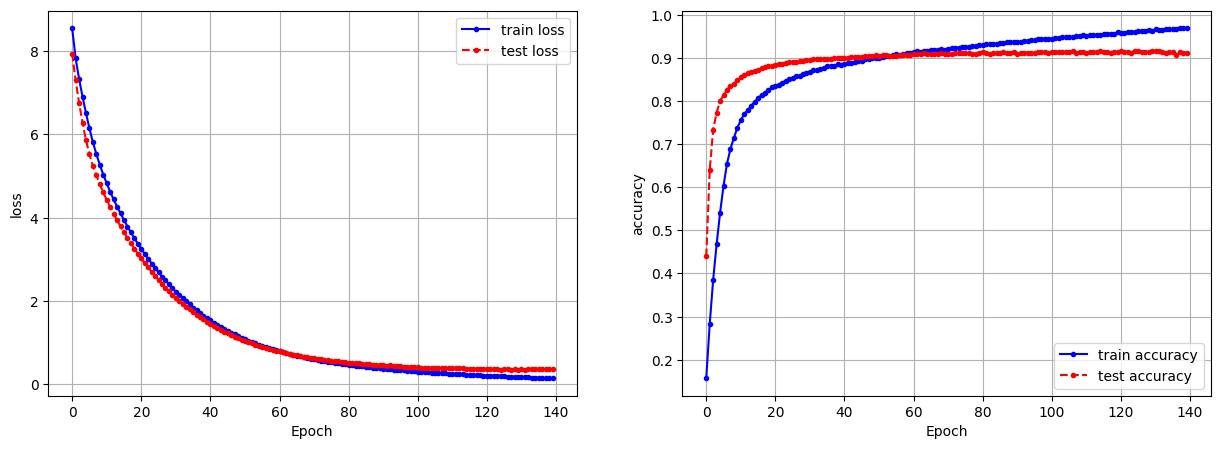

In [ ]:
while strat_loop == True:
  nr_of_loops += 1
  fit_history = my_model.fit(x_train, y_train, batch_size = batchsize, epochs = nr_of_epochs, validation_data = (x_test, y_test))
  if full_history == None:
    full_history = fit_history
  else:
    for key in full_history.history:
      full_history.history[key] = full_history.history[key] + fit_history.history[key]

  curr_acc = sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10
  delta_acc = ((sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10) / (sum(full_history.history['val_sparse_categorical_accuracy'][-20:])/20)) if nr_of_loops > 2 else 2
  delta_loss = ((sum(full_history.history['val_loss'][-10:])/10) / (sum(full_history.history['val_loss'][-20:])/20)) if nr_of_loops > 2 else 0

  print(f'Current accuracy: {curr_acc}, delta accuracy: {delta_acc}, delta loss: {delta_loss}')


  if (curr_acc >= target_acc) or ((nr_of_loops * nr_of_epochs) >= max_epochs) or ((delta_acc < 1) and (delta_loss > 1)):
    strat_loop = False

  if sum(full_history.history['val_sparse_categorical_accuracy'][-10:])/10 >= target_acc:
    strat_loop = False

show_fit_history(full_history)

In [ ]:
my_model_2_history = pd.DataFrame(np.array([['my_model_2 bassed on VGG16' for el in full_history.history['loss']], full_history.history['loss'],
                                            full_history.history['sparse_categorical_accuracy'], full_history.history['val_loss'],
                                            full_history.history['val_sparse_categorical_accuracy']]).T,
                                  columns = ['model', 'train_loss', 'train_acc', 'val_loss',
                                              'val_acc'])


my_model_2_history.to_csv('/content/drive/MyDrive/saved_models/my_model_2_history.csv', index=False)
keras.models.save_model(my_model, '/content/drive/MyDrive/saved_models/my_model_2.h5')
keras.models.save_model(my_model, '/content/drive/MyDrive/saved_models/my_model_2.keras')
